<a href="https://colab.research.google.com/github/Maneesh-dev19/Data-Analytics/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
dataset= pd.read_csv('/content/gdrive/My Drive/ML_lab/heart.csv')

In [ ]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Checking Blank Value or Missing Value

In [ ]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Finding Correlation for Every Numerical Features

In [ ]:
corr = dataset.corr()
corr.style\
    .background_gradient(cmap='bwr')\
    .set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


Seaborn heatmap visualization

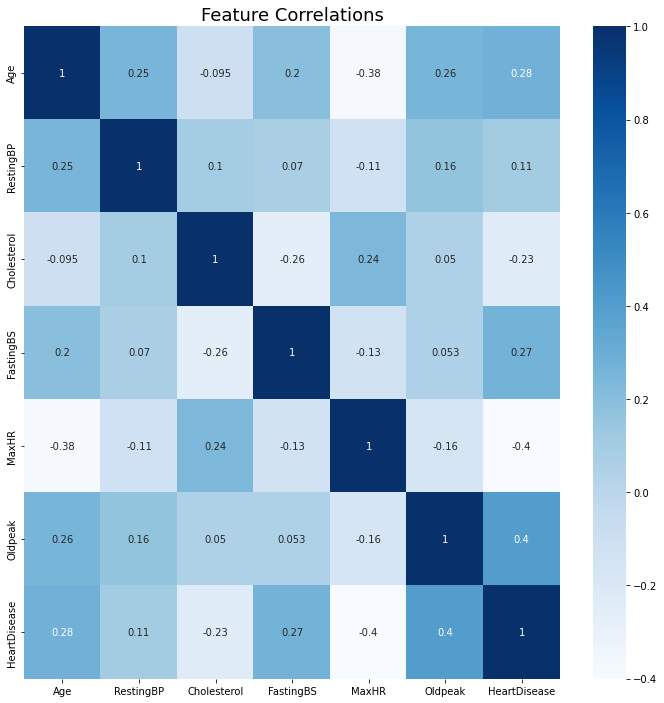

In [ ]:
plt.figure(figsize = (12, 12))
plt.title("Feature Correlations", fontsize = 18)
sns.heatmap(corr, annot = True, cmap = "Blues")

 analyze the Variance Inflation Factor (VIF) to see the colinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
numeric_ds = dataset.select_dtypes(['number'])
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Age,30.462968
1,RestingBP,43.070748
2,Cholesterol,5.106418
3,FastingBS,1.500987
4,MaxHR,20.458949
5,Oldpeak,2.122029
6,HeartDisease,3.222266


The restingBP, Age, and MaxHR have VIF big value. It is showing that there are colinearity in those 3 features. Therefore, we drop the biggest VIF (RestingBP) then calculate again the VIF.

In [ ]:
numeric_ds = numeric_ds.drop('RestingBP', axis=1)
vif.drop(vif.index, inplace=True)
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Age,17.294587
1,Cholesterol,4.960139
2,FastingBS,1.500343
3,MaxHR,14.889208
4,Oldpeak,2.121690
5,HeartDisease,3.151320


We could see that the VIF reduced. Now we proceed to drop Age then calculate again the VIF.

In [ ]:
numeric_ds = numeric_ds.drop('Age', axis=1)
vif.drop(vif.index, inplace=True)
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Cholesterol,4.846509
1,FastingBS,1.455528
2,MaxHR,6.048800
3,Oldpeak,2.077846
4,HeartDisease,2.651516


we drop those 2 features from our main dataset.

After dropping RestingBP and Age, we got VIF which acceptable. Is is indeed showing similiar information between Age, RestingBP, and MaxHR.

In [ ]:
dataset = dataset.drop(['Age', 'RestingBP'], axis=1)
dataset

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,289,0,Normal,172,N,0.0,Up,0
1,F,NAP,180,0,Normal,156,N,1.0,Flat,1
2,M,ATA,283,0,ST,98,N,0.0,Up,0
3,F,ASY,214,0,Normal,108,Y,1.5,Flat,1
4,M,NAP,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,M,TA,264,0,Normal,132,N,1.2,Flat,1
914,M,ASY,193,1,Normal,141,N,3.4,Flat,1
915,M,ASY,131,0,Normal,115,Y,1.2,Flat,1
916,F,ATA,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
dataset.select_dtypes(exclude="number").nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

Encoded Sex to : 1 if Male, 0 if Female

Encoded ExerciseAngina to : 1 if Yes, 0 if No.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['ExerciseAngina']=le.fit_transform(dataset['ExerciseAngina'])
dataset

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,ATA,289,0,Normal,172,0,0.0,Up,0
1,0,NAP,180,0,Normal,156,0,1.0,Flat,1
2,1,ATA,283,0,ST,98,0,0.0,Up,0
3,0,ASY,214,0,Normal,108,1,1.5,Flat,1
4,1,NAP,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,1,TA,264,0,Normal,132,0,1.2,Flat,1
914,1,ASY,193,1,Normal,141,0,3.4,Flat,1
915,1,ASY,131,0,Normal,115,1,1.2,Flat,1
916,0,ATA,236,0,LVH,174,0,0.0,Flat,1


In [ ]:
dataset = pd.get_dummies(dataset, drop_first=False)
dataset

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,0,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,1,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,0,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,1,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,1,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,1,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,0,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
heart_dis = dataset['HeartDisease']
dataset = dataset.drop('HeartDisease', axis=1)
dataset.insert(loc=len(dataset.columns), column='HeartDisease', value=heart_dis)
dataset

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,1,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,0,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,1,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,0,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,1,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,0,0,0,1,0,1,0,0,1,0,1
914,1,193,1,141,0,3.4,1,0,0,0,0,1,0,0,1,0,1
915,1,131,0,115,1,1.2,1,0,0,0,0,1,0,0,1,0,1
916,0,236,0,174,0,0.0,0,1,0,0,1,0,0,0,1,0,1


Transforming Dataset to Array

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[  1. 289.   0. ...   0.   0.   1.]
 [  0. 180.   0. ...   0.   1.   0.]
 [  1. 283.   0. ...   0.   0.   1.]
 ...
 [  1. 131.   0. ...   0.   1.   0.]
 [  0. 236.   0. ...   0.   1.   0.]
 [  1. 175.   0. ...   0.   0.   1.]]


In [ ]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

Separate the Training Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

Scaling the Training Set

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.52352084  2.4030476   1.84668796 ...  3.53414715 -1.01759666
  -0.84599688]
 [ 0.52352084  1.12848987 -0.54151    ... -0.2829537  -1.01759666
   1.18203745]
 [-1.91014362  0.77496291  1.84668796 ... -0.2829537  -1.01759666
   1.18203745]
 ...
 [ 0.52352084  0.03069562 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [ 0.52352084 -0.01582109 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [ 0.52352084  0.62610945 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]]


In [ ]:
print(x_test)

[[ 0.52352084  1.57505024 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [ 0.52352084  0.15163905 -0.54151    ... -0.2829537  -1.01759666
   1.18203745]
 [ 0.52352084  0.82147961 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 ...
 [ 0.52352084  0.17954907 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [-1.91014362  0.2539758  -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [-1.91014362  0.28188583 -0.54151    ... -0.2829537  -1.01759666
   1.18203745]]


#Classification Model Building using SVC with RBF Kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=27)
classifier.fit(x_train, y_train)

SVC(random_state=27)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
result_np = np.concatenate((y_pred.reshape(len(y_pred), 1), (y_test.reshape(len(y_test), 1))), 1)
result = pd.DataFrame(result_np, columns=['Prediction', 'Real_Value'])
result

,Prediction,Real_Value
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
225,1,1
226,1,0
227,1,1
228,1,0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       104
           1       0.85      0.94      0.89       126

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=classifier, X = x_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Accuracy: 86.06 %
Std. Dev: 2.96 %


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8696


# KNN Algorithm

In [ ]:
df1=dataset.drop('HeartDisease',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(df1,dataset['HeartDisease'],test_size=0.3,random_state=45)

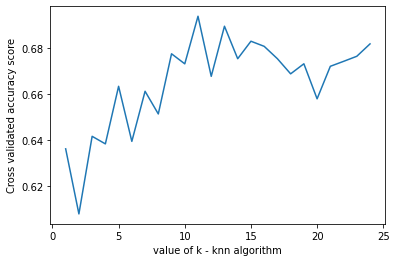

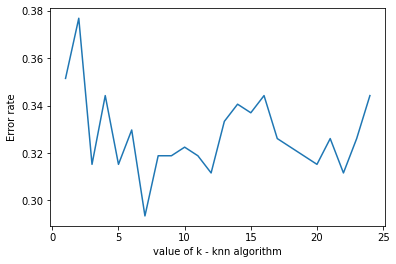

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,df1,dataset['HeartDisease'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

In [ ]:
%matplotlib inline
def plot(distance_metric):
 distance_measure="K value Vs Testing accuracy , Distance measure :"+distance_metric
 plt.title(distance_measure)
 plt.plot(k_range, scores)
 plt.xlabel('Value of K for KNN')
 plt.ylabel('Testing Accuracy')
scores = []

In [ ]:
def prediction(distance_measure):
 print("Using distance metric : ",distance_measure);print();
 for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k,metric=distance_measure)
  knn.fit(X_train, y_train)
  y_pred= knn.predict (X_test)
  print("Accuracy for k =",k)
  print(accuracy_score(y_test, y_pred))
  scores.append(metrics.accuracy_score(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  #print(confusion_matrix(y_test, y_pred))
  print();
 plot(distance_measure)

Using distance metric :  manhattan

Accuracy for k = 1
0.7028985507246377

Accuracy for k = 2
0.6630434782608695

Accuracy for k = 3
0.7644927536231884

Accuracy for k = 4
0.7463768115942029

Accuracy for k = 5
0.7536231884057971

Accuracy for k = 6
0.7536231884057971

Accuracy for k = 7
0.7681159420289855

Accuracy for k = 8
0.7681159420289855

Accuracy for k = 9
0.7427536231884058

Accuracy for k = 10
0.7463768115942029

Accuracy for k = 11
0.7536231884057971

Accuracy for k = 12
0.7355072463768116

Accuracy for k = 13
0.7318840579710145

Accuracy for k = 14
0.7427536231884058

Accuracy for k = 15
0.7355072463768116

Accuracy for k = 16
0.7427536231884058

Accuracy for k = 17
0.7246376811594203

Accuracy for k = 18
0.7210144927536232

Accuracy for k = 19
0.717391304347826

Accuracy for k = 20
0.7246376811594203

Accuracy for k = 21
0.7101449275362319

Accuracy for k = 22
0.7246376811594203

Accuracy for k = 23
0.7101449275362319

Accuracy for k = 24
0.717391304347826



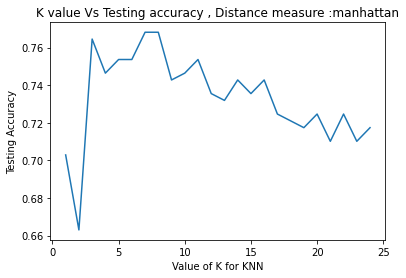

In [ ]:
from sklearn import metrics
scores=[]
prediction("manhattan")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')